训练集的RMSE为 0.8791651738799311
测试集的RMSE为 0.6549306212983926


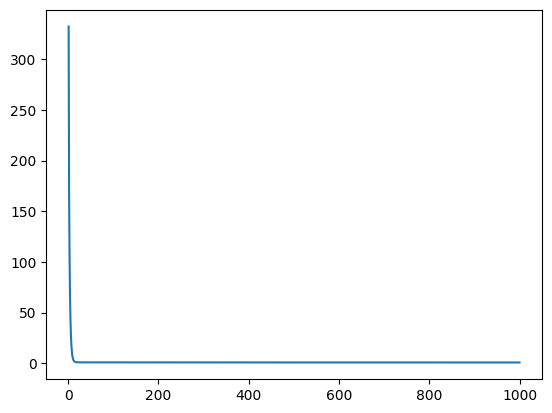

In [19]:
#coding=utf-8
from tkinter import E, Y
import numpy as np
import pandas
import matplotlib.pyplot as plt 

learning_rate=0.1
train_number=3000

iteration=1000
df=pandas.read_csv(r'E:\Study\Python\the_fourth_course\temperature_dataset.csv',header=None)
data=np.array(df)
d=data.shape[1]-1 
test_number=np.shape(data)[0]-train_number
#特征缩放（均值归一化）
x_mean=np.mean(data[:train_number,1:],axis=0)
x_std=np.std(data[:train_number,1:],axis=0,ddof=1)
data[:,1:]=(data[:,1:]-x_mean)/x_std

x_train=data[:train_number,1:].T
y_train=data[:train_number,0].T
x_test=data[train_number:,1:].T
y_test=data[train_number:,0].T
w=np.zeros((1,d)).reshape(-1,1)
b=0
v=np.ones((1,train_number)).reshape(train_number,1)
cost_saved=[]
cost=0

for i in range(0,iteration):
    y_hat=np.dot(w.T,x_train)+b
    e=y_hat-y_train
    w=w-learning_rate*np.dot(x_train,e.T)*2/train_number
    b=b-learning_rate*np.dot(e,v)*2/train_number
    cost=np.dot(e,e.T)/train_number
    cost_saved.append(cost.item(0))
MSE_train=cost.item(0)
RMSE_train=np.sqrt(MSE_train)
print('训练集的RMSE为',RMSE_train)

y_hat_test=np.dot(w.T,x_test)+b
e_test=y_hat_test-y_test
MSE_test=np.dot(e_test,e_test.T)/test_number
RMSE_test=np.sqrt(MSE_test).item(0)
print('测试集的RMSE为',RMSE_test)

plt.plot(range(1,iteration+1),cost_saved)
plt.show()
